## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

### Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


## 1- Analisis Exploratorio

### A - Análisis descriptivo del dataset de entrenamiento (TRAIN)

In [406]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [407]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [408]:
train.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [409]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = train[train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TRAIN:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TRAIN:")
print(missing_percentage)

Valores faltantes por variable en TRAIN:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por variable en TRAIN:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


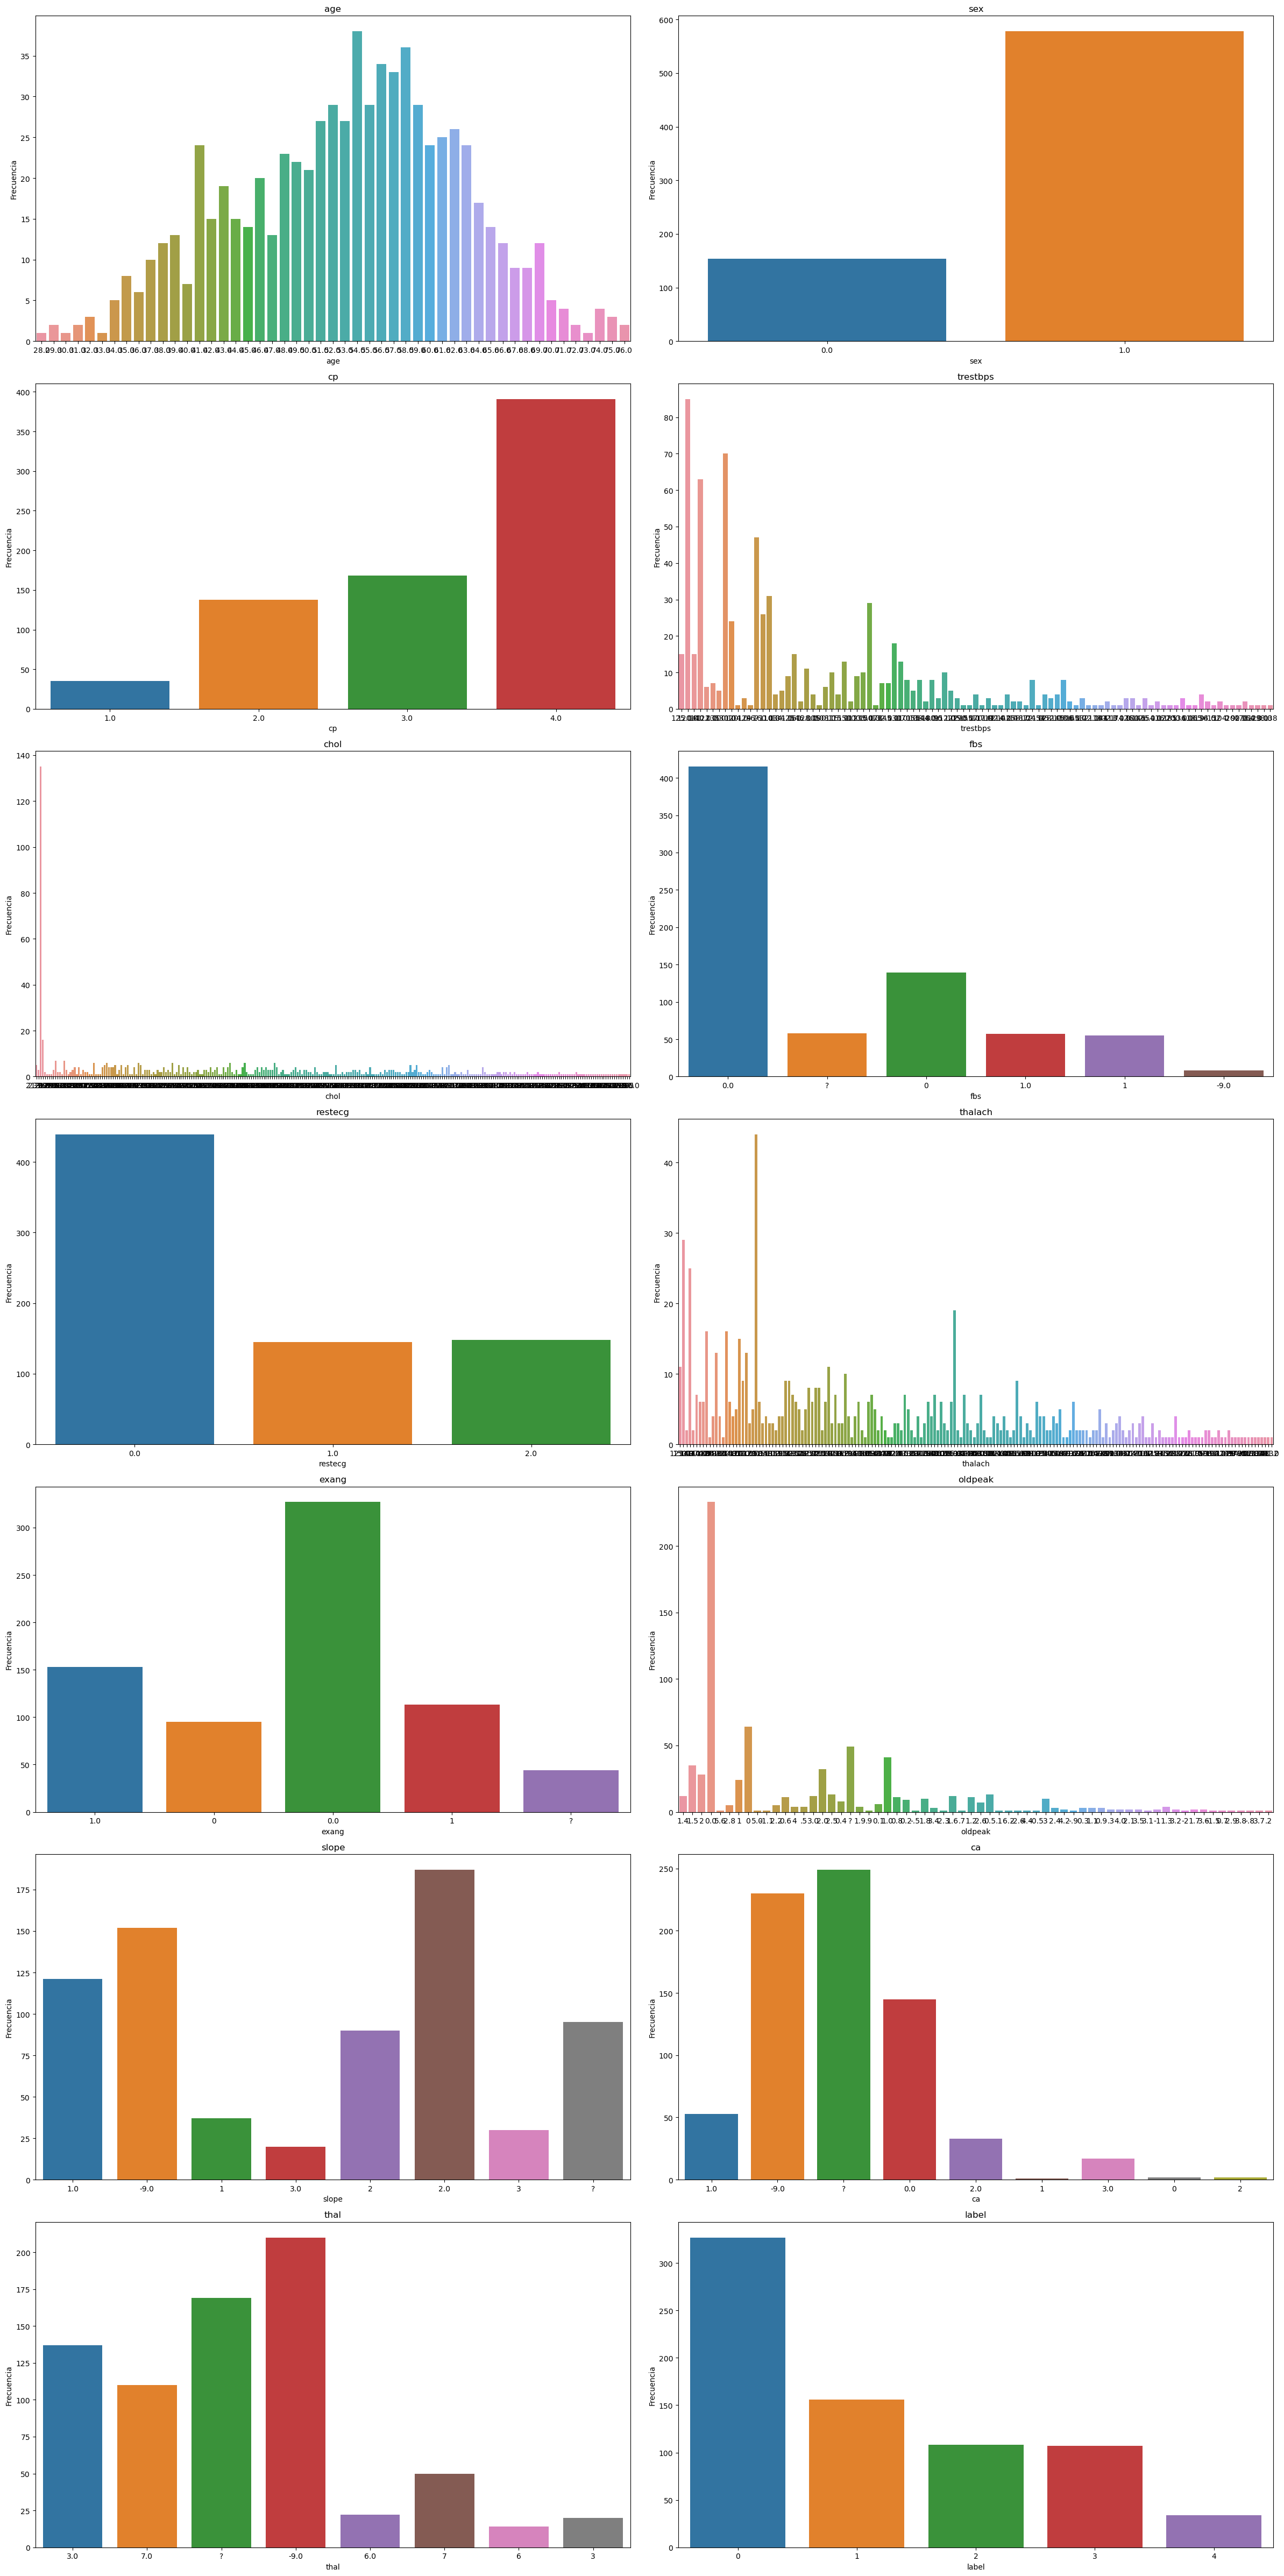

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B - Análisis descriptivo del dataset de testeo (TEST)

In [411]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [412]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    object 
 4   chol      184 non-null    object 
 5   fbs       184 non-null    object 
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    object 
 9   oldpeak   184 non-null    object 
 10  slope     184 non-null    object 
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(3), object(10)
memory usage: 18.8+ KB


In [413]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = test[test == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TEST:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(test)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TEST:")
print(missing_percentage)

Valores faltantes por variable en TEST:
ca          69
thal        49
slope       24
fbs         23
oldpeak     13
trestbps    11
thalach     10
exang       10
chol         2
restecg      1
age          0
sex          0
cp           0
dtype: int64

Porcentaje de valores faltantes por variable en TEST:
ca          37.500000
thal        26.630435
slope       13.043478
fbs         12.500000
oldpeak      7.065217
trestbps     5.978261
thalach      5.434783
exang        5.434783
chol         1.086957
restecg      0.543478
age          0.000000
sex          0.000000
cp           0.000000
dtype: float64


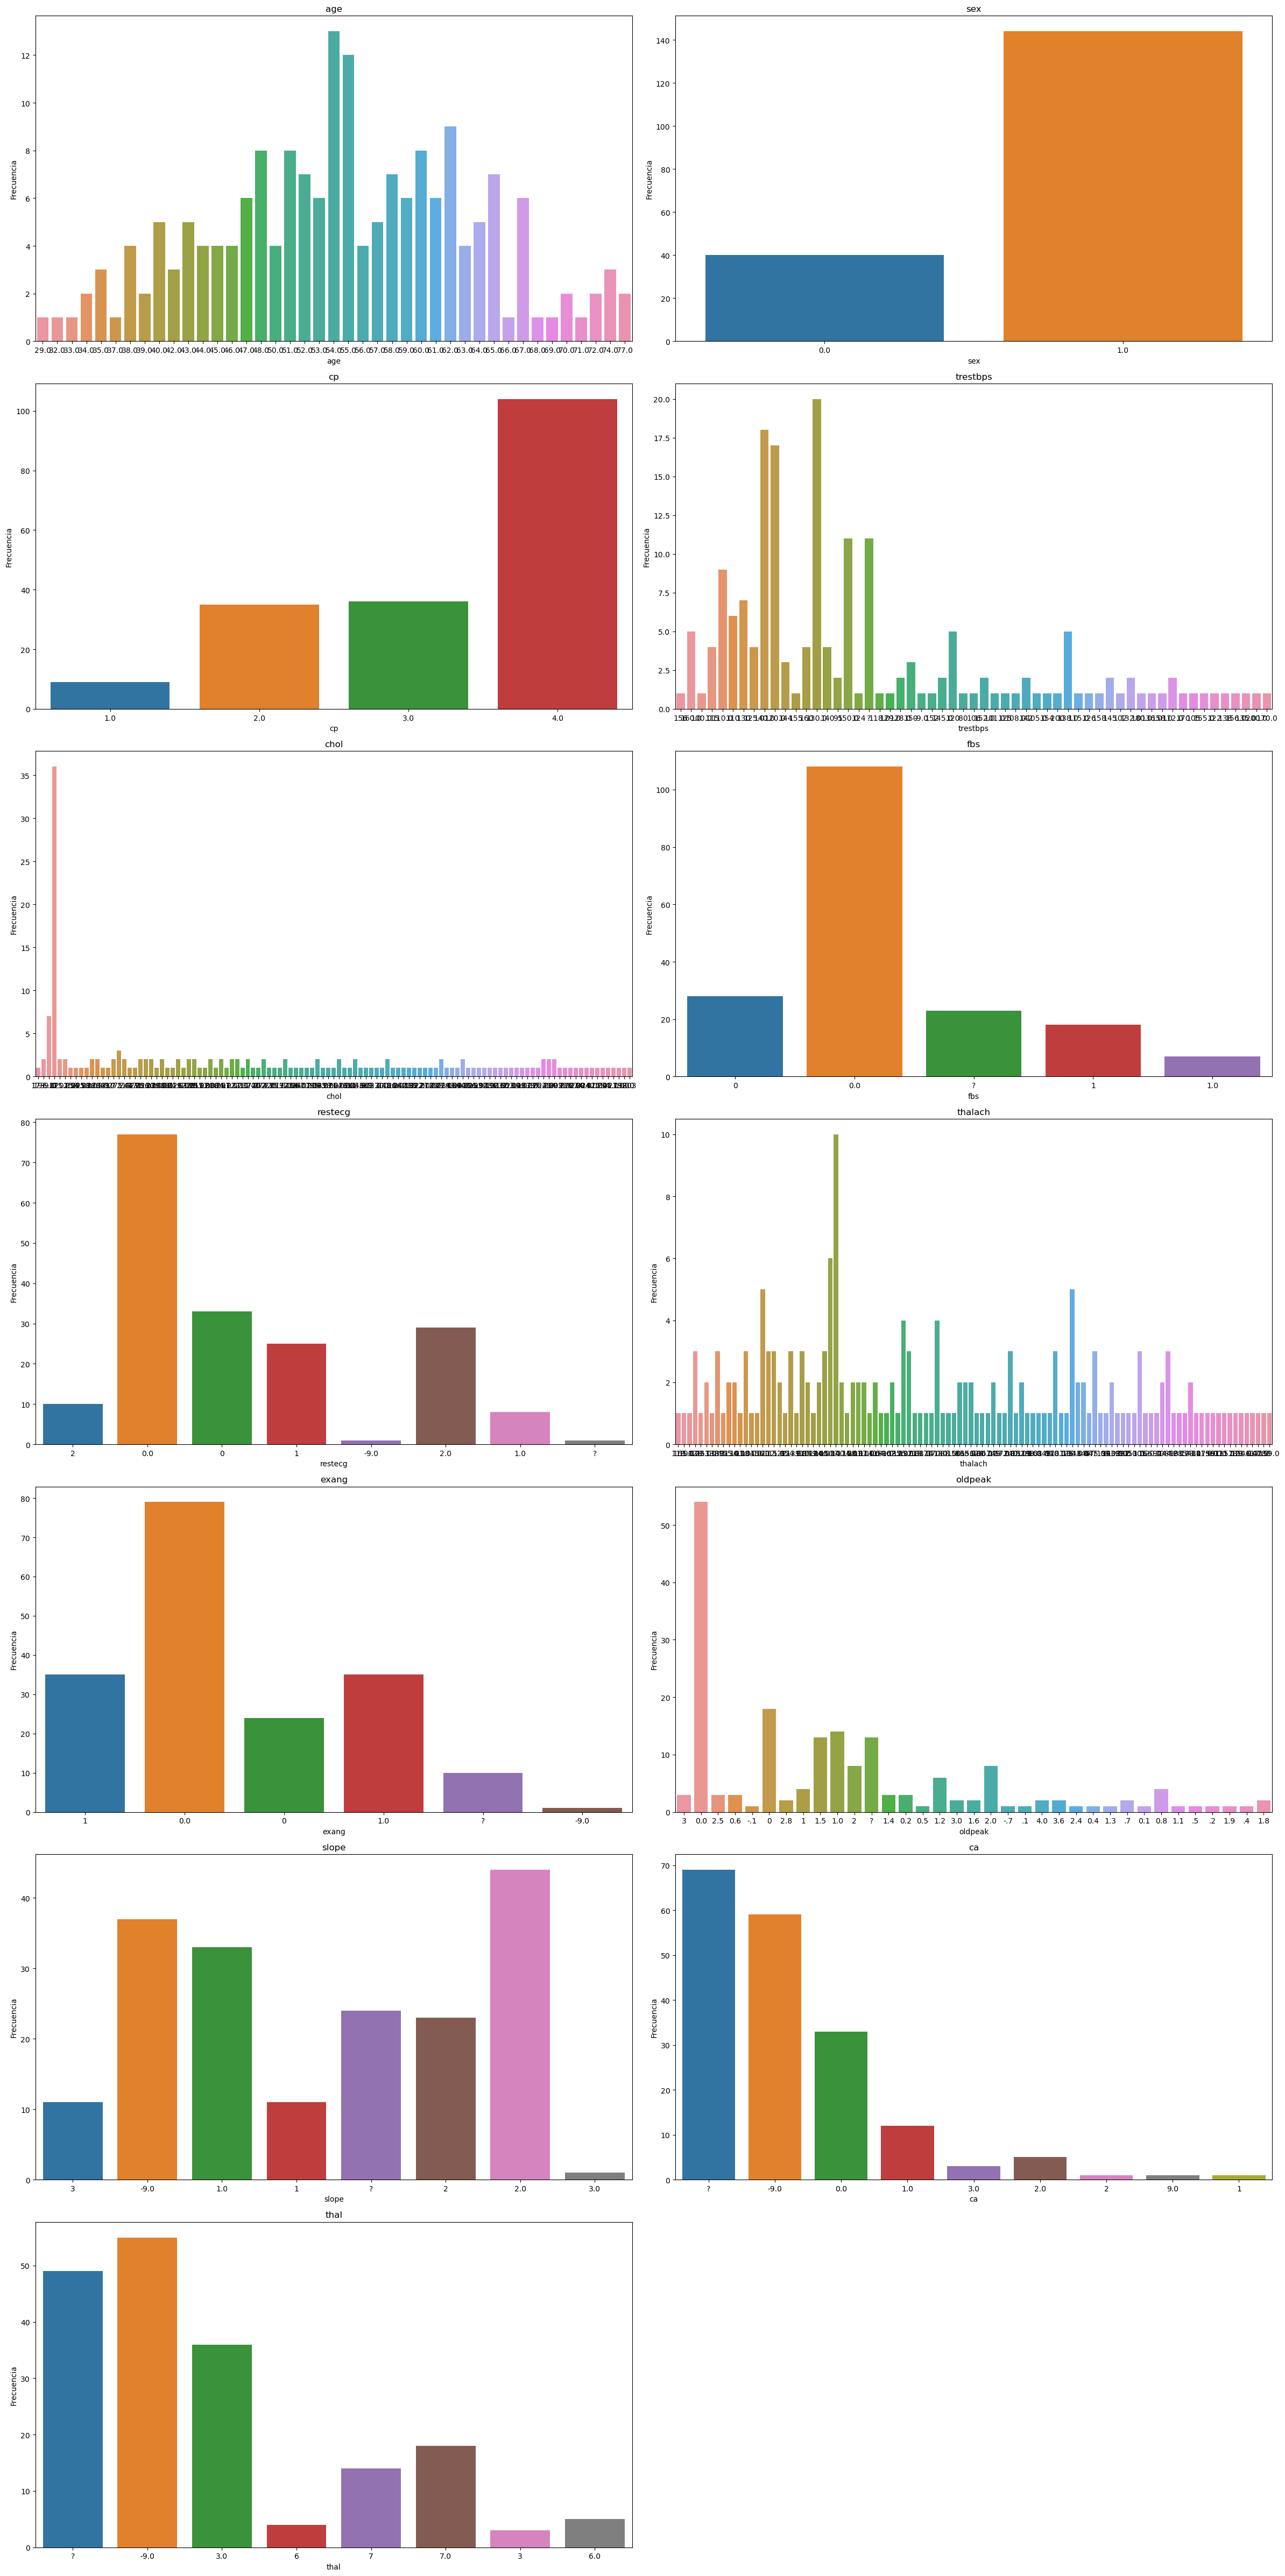

In [414]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=test, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## 2 -Tratamiento del Dataset

### A- Transformaciones dataset TRAIN

#### Definicion de datatypes

In [415]:
train = pd.read_csv("train.csv")
train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [416]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [417]:
import numpy as np
import pandas as pd

# Reemplazar '?' con NaN 
train = train.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
train[int_cols] = train[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
train[float_cols] = train[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        train[col] = train[col].replace(-9, np.nan)
    else:
        train[col] = train[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 or x == -9 else x)

# Convertir las columnas discretas a tipo entero
train[int_cols] = train[int_cols].astype('Int64')

# Verificar la información del DataFrame
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,<NA>,7,2
2,63,1,4,140.0,0.0,<NA>,2,149.0,0,2.0,1,<NA>,<NA>,2
3,52,0,2,140.0,NaN,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0
4,55,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.0,<NA>,<NA>,<NA>,0
728,62,1,3,NaN,204.0,0,1,NaN,<NA>,NaN,<NA>,<NA>,<NA>,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.0,<NA>,<NA>,6,1


In [418]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,732.0,732.0,732.0,685.000000,711.000000,666.0,732.0,688.000000,688.0,683.000000,485.0,253.0,353.0,732.0
mean,53.364754,0.789617,3.25,131.975182,199.956399,0.168168,0.602459,138.132267,0.386628,0.881259,1.77732,0.6917,5.11898,1.132514
std,9.306868,0.407859,0.923363,19.203305,110.928639,0.374297,0.802966,25.963443,0.487331,1.112960,0.616493,0.946909,1.921028,1.257615
min,28.0,0.0,1.0,0.000000,0.000000,0.0,0.0,60.000000,0.0,-2.600000,1.0,0.0,3.0,0.0
25%,47.0,1.0,3.0,120.000000,176.500000,0.0,0.0,120.000000,0.0,0.000000,1.0,0.0,3.0,0.0
50%,54.0,1.0,4.0,130.000000,223.000000,0.0,0.0,140.000000,0.0,0.500000,2.0,0.0,6.0,1.0
75%,60.0,1.0,4.0,140.000000,268.500000,0.0,1.0,158.250000,1.0,1.550000,2.0,1.0,7.0,2.0
max,76.0,1.0,4.0,200.000000,603.000000,1.0,2.0,202.000000,1.0,6.200000,3.0,3.0,7.0,4.0


#### Reemplazo de valores missing

##### **Opcion 1** - Reemplazo de ***valores faltantes NaN*** por la mediana en las variables float y por la moda en las variables int 


In [419]:
# Copia df
train_copy_a =  train.copy()


# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_a[col].fillna(train_copy_a[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_a[col].fillna(train_copy_a[col].median(), inplace=True)

Comprobacion de ausencia de valores nulos e integridad del dataset

In [420]:
train_copy_a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    Int64  
 1   sex       732 non-null    Int64  
 2   cp        732 non-null    Int64  
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    Int64  
 6   restecg   732 non-null    Int64  
 7   thalach   732 non-null    float64
 8   exang     732 non-null    Int64  
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    Int64  
 11  ca        732 non-null    Int64  
 12  thal      732 non-null    Int64  
 13  label     732 non-null    Int64  
dtypes: Int64(10), float64(4)
memory usage: 87.3 KB


##### **Opcion 2** - Analisis de cada variable imputando valores faltantes en base a la mediana de combinaciones con edad y sexo.

In [421]:
#Copia del df
train_copy_b =  train.copy()


int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

print(train_copy_b.isnull().sum())

age           0
sex           0
cp            0
trestbps     47
chol         21
fbs          66
restecg       0
thalach      44
exang        44
oldpeak      49
slope       247
ca          479
thal        379
label         0
dtype: int64


In [422]:
from sklearn.impute import KNNImputer

#Copia del df 
train_copy_b =  train.copy()


int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']


train_copy_b['chol'].replace(0, np.nan, inplace=True)

# Step 1: Calculate the average 'chol' for each combination of age and gender
average_chol = train_copy_b.groupby(['age', 'sex'])['chol'].mean()


# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_chol(row):
    if pd.isnull(row['chol']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_chol:
            return average_chol[(age, sex)]
    return row['chol']

train_copy_b['chol'] = train_copy_b.apply(fill_missing_chol, axis=1)


#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['chol'] .isnull().sum())
print(train_copy_b['chol'].mean())

train_copy_b['chol'] 
average_chol

2
245.80531100375643


age  sex
28   1      132.0
29   1      223.5
30   0      237.0
31   0      219.0
     1      270.0
            ...  
73   0        NaN
74   1      237.0
75   1      246.0
76   0      197.0
     1        NaN
Name: chol, Length: 87, dtype: float64

In [423]:
train_copy_b['thalach'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_thalach = train_copy_b.groupby(['age', 'sex'])['thalach'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_thalach(row):
    if pd.isnull(row['thalach']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_thalach:
            return average_chol[(age, sex)]
    return row['thalach']

train_copy_b['thalach'] = train_copy_b.apply(fill_missing_thalach, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['thalach'] .isnull().sum())
print(train_copy_b['thalach'].mean())


train_copy_b['thalach']


0
144.31757258075254


0      125.000000
1      150.000000
2      149.000000
3      140.000000
4      111.000000
          ...    
727    150.000000
728    218.416667
729    165.000000
730    132.000000
731    163.000000
Name: thalach, Length: 732, dtype: float64

In [424]:
train_copy_b['trestbps'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_trestbps = train_copy_b.groupby(['age', 'sex'])['trestbps'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_trestbps(row):
    if pd.isnull(row['trestbps']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_trestbps:
            return average_chol[(age, sex)]
    return row['trestbps']

train_copy_b['trestbps'] = train_copy_b.apply(fill_missing_thalach, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['trestbps'] .isnull().sum())
print(train_copy_b['trestbps'].mean())

train_copy_b['trestbps']


0
144.31757258075254


0      125.000000
1      150.000000
2      149.000000
3      140.000000
4      111.000000
          ...    
727    150.000000
728    218.416667
729    165.000000
730    132.000000
731    163.000000
Name: trestbps, Length: 732, dtype: float64

In [425]:
# Step 1: Group by 'cp' and 'age' and get the mode of 'fbs'
mode_fbs_by_cp_age = train_copy_b.groupby(['age','cp'])['fbs'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'fbs' based on the mode for the corresponding 'cp' and 'age' combination
def fill_missing_fbs(row):
    if pd.isnull(row['fbs']):
        cp = row['cp']
        age = row['age']
        if (cp, age) in mode_fbs_by_cp_age:
            return mode_fbs_by_cp_age[(cp, age)]
    return row['fbs']

train_copy_b['fbs'] = train_copy_b.apply(fill_missing_fbs, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['fbs'] .isnull().sum())
print(train_copy_b['fbs'].median())


train_copy_b['fbs']


66
0.0


0       0.0
1       0.0
2      <NA>
3       0.0
4       0.0
       ... 
727     0.0
728     0.0
729     0.0
730     1.0
731     0.0
Name: fbs, Length: 732, dtype: object

In [426]:
# Step 1: Group by 'cp' and 'restecg' and get the mode of 'exang'
mode_exang_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'exang' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_exang(row):
    if pd.isnull(row['exang']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_exang_by_cp_restecg:
            return mode_exang_by_cp_restecg[(cp, restecg)]
    return row['exang']

train_copy_b['exang'] = train_copy_b.apply(fill_missing_exang, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['exang'] .isnull().sum())
print(train_copy_b['exang'].median())

train_copy_b['exang']

0
0.0


0      1
1      1
2      0
3      0
4      1
      ..
727    0
728    0
729    0
730    0
731    0
Name: exang, Length: 732, dtype: int64

In [427]:
# Step 1: Calculate the average 'oldpeak' for each combination of age and gender
average_oldpeak = train_copy_b.groupby(['age', 'sex'])['oldpeak'].median()

# Step 2: Fill in the missing values in the 'oldpeak' column with the corresponding average value based on age and gender
def fill_missing_oldpeak(row):
    if pd.isnull(row['oldpeak']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_oldpeak:
            return average_oldpeak[(age, sex)]
    return row['oldpeak']

train_copy_b['oldpeak'] = train_copy_b.apply(fill_missing_oldpeak, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['oldpeak'] .isnull().sum())
print(train_copy_b['oldpeak'].median())

train_copy_b['oldpeak']

0
0.5


0      1.40
1      1.50
2      2.00
3      0.00
4      5.60
       ... 
727    0.00
728    0.25
729    0.20
730    0.00
731    0.00
Name: oldpeak, Length: 732, dtype: float64

In [428]:
# Step 1: Group by 'cp' and 'restecg' and get the mode of 'slope'
mode_slope_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'slope' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_slope(row):
    if pd.isnull(row['slope']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_slope_by_cp_restecg:
            return mode_slope_by_cp_restecg[(cp, restecg)]
    return row['slope']

train_copy_b['slope'] = train_copy_b.apply(fill_missing_slope, axis=1)

print(train_copy_b['slope'] .isnull().sum())
print(train_copy_b['slope'].median())


train_copy_b['slope']

0
2.0


0      1
1      2
2      1
3      1
4      3
      ..
727    2
728    2
729    2
730    2
731    1
Name: slope, Length: 732, dtype: int64

In [429]:
# Step 1: Calculate the mode 'ca' for each age
mode_ca_by_age = train_copy_b.groupby('age')['ca'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 2: Fill in the missing values in the 'ca' column with the corresponding mode value based on age
def fill_missing_ca(row):
    if pd.isnull(row['ca']):
        age = row['age']
        if age in mode_ca_by_age:
            return mode_ca_by_age[age]
    return row['ca']

train_copy_b['ca'] = train_copy_b.apply(fill_missing_ca, axis=1)

print(train_copy_b['ca'] .isnull().sum())
print(train_copy_b['ca'].median())

train_copy_b['ca']

22
0.0


0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
727    0.0
728    0.0
729    0.0
730    0.0
731    0.0
Name: ca, Length: 732, dtype: float64

In [430]:
# Step 1: Calculate the mode 'thal' for each age
mode_thal_by_age = train_copy_b.groupby('age')['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 2: Fill in the missing values in the 'thal' column with the corresponding mode value based on age
def fill_missing_thal(row):
    if pd.isnull(row['thal']):
        age = row['age']
        if age in mode_thal_by_age:
            return mode_thal_by_age[age]
    return row['thal']

train_copy_b['thal'] = train_copy_b.apply(fill_missing_thal, axis=1)

print(train_copy_b['thal'] .isnull().sum())
print(train_copy_b['thal'].median())

train_copy_b['thal']

13
6.0


0      3.0
1      7.0
2      3.0
3      3.0
4      7.0
      ... 
727    3.0
728    3.0
729    3.0
730    6.0
731    3.0
Name: thal, Length: 732, dtype: float64

In [431]:
print(train_copy_b.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         2
fbs         66
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          22
thal        13
label        0
dtype: int64


##### **Opcion 3** - KNN (K-Nearest Neighbors): imputa los valores faltantes utilizando los valores de las observaciones más similares en función de otras variables. Calcula los vecinos más cercanos y usar sus valores para imputar los valores faltantes. Se aplica solo a variables float

In [432]:

train_copy_knn =  train_copy_b.copy()

# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_knn[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_knn[int_cols].fillna(train_copy_knn.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_knn = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputacion
# Check for missing values
train_copy_knn = train_copy_knn[train.columns]
train_copy_knn


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.000000,213.0,0.0,2,125.000000,1,1.40,1,1.0,3.0,0
1,54,1,3,150.000000,237.0,0.0,0,150.000000,1,1.50,2,1.0,7.0,2
2,63,1,4,149.000000,248.0,0.0,2,149.000000,0,2.00,1,0.0,3.0,2
3,52,0,2,140.000000,214.5,0.0,0,140.000000,0,0.00,1,0.0,3.0,0
4,55,1,4,111.000000,217.0,0.0,0,111.000000,1,5.60,3,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,150.000000,230.0,0.0,0,150.000000,0,0.00,2,0.0,3.0,0
728,62,1,3,218.416667,204.0,0.0,1,218.416667,0,0.25,2,0.0,3.0,1
729,43,0,3,165.000000,213.0,0.0,0,165.000000,0,0.20,2,0.0,3.0,0
730,68,1,3,132.000000,195.0,1.0,0,132.000000,0,0.00,2,0.0,6.0,1


In [433]:
# Check if there are any missing values left
print(train_copy_knn.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


##### **Opcion 4** Reemplazo de valores faltantes por la mediana o moda, y eliminacion de outliers 

In [434]:
from sklearn.impute import KNNImputer

# Copia del DataFrame
train_copy_c = train.copy()

#complete_cols = ['age', 'label', 'sex', 'cp', 'restecg','thalach','exang']

# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_c[col].fillna(train_copy_c[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_c[col].fillna(train_copy_c[col].median(), inplace=True)

#train_copy_c = train_copy_c[complete_cols]

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_c[float_cols].quantile(0.25)
Q3 = train_copy_c[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_c[float_cols] < (Q1 - threshold * IQR)) | (train_copy_c[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_c_no_outliers = train_copy_c[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_c_no_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,2,0,7,2
3,52,0,2,140.0,223.0,0,0,140.0,0,0.0,2,0,7,0
5,44,1,4,120.0,169.0,0,0,144.0,1,2.8,3,0,6,2
6,35,1,2,122.0,192.0,0,0,174.0,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.0,2,0,7,0
728,62,1,3,130.0,204.0,0,1,140.0,0,0.5,2,0,7,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.0,2,0,6,1


##### **Opcion 5** eliminacion de valores atipicos y Imputacion con KNN para variables float y moda para variables int

In [435]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
train_copy_d =  train.copy()

# Reemplazar valores cero con NaN
train_copy_d[float_cols] = train_copy_d[float_cols].replace(0, float('nan'))

# Imputar valores faltantes utilizando KNNImputer
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_d[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)


# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_d[int_cols].fillna(train_copy_d.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_d = pd.concat([categorical_imputed_df, numeric_imputed_df], axis=1)

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_d[float_cols].quantile(0.25)
Q3 = train_copy_d[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_d[float_cols] < (Q1 - threshold * IQR)) | (train_copy_d[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_d_no_outliers = train_copy_d[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_d_no_outliers = train_copy_d_no_outliers[train.columns]
train_copy_d_no_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.40,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.50,2,0,7,2
2,63,1,4,140.0,237.2,0,2,149.0,0,2.00,1,0,7,2
3,52,0,2,140.0,259.2,0,0,140.0,0,2.18,2,0,7,0
5,44,1,4,120.0,169.0,0,0,144.0,1,2.80,3,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,1.48,2,0,7,0
728,62,1,3,125.2,204.0,0,1,164.8,0,1.26,2,0,7,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.20,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,1.34,2,0,6,1


##### **Opcion 6** Normalizacion de variables continuas a partir de parametros normales, e imputacion de moda para categoricas.

In [436]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
train_copy_e =  train.copy()

float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']

train_float = train_copy_e[float_cols]
train_categorical = train_copy_e[int_cols].fillna(train_copy_e.mode().iloc[0])

def imputar_valores_anormales(df, rangos_normales):

    # Inicializar un DataFrame para almacenar los valores imputados
    df_imputado = df.copy()
    
    # Iterar sobre cada columna y su rango normal correspondiente
    for col, rango_normal in rangos_normales.items():
        min_val, max_val = rango_normal
        
        # Imputar los valores dentro o fuera del rango normal
        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)
    
    return df_imputado


# Ejemplo de uso

rangos_normales = {
    'chol': (0, 250),    # Colesterol total: 125-200 mg/dL
    'trestbps': (0, 120), # Presión arterial en reposo (sistólica): < 120 mmHg
    'thalach': (0, 100),  # Frecuencia cardíaca máxima: 60-100 latidos por minuto
    'oldpeak': (0, 1.7)    # Depresión del segmento ST inducida por el ejercicio: < 1.0 mm
}  

# Aplicar funcion
train_float_imputado = imputar_valores_anormales(train_float, rangos_normales)



# Combinar las variables float y int imputadas
train_copy_e = pd.concat([train_categorical, train_float_imputado], axis=1)

train_copy_e = train_copy_e[train.columns]

train_copy_e

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,1,0,0,2,1,1,0,1,1,3,0
1,54,1,3,0,0,0,0,1,1,0,2,0,7,2
2,63,1,4,1,0,0,2,1,0,1,1,0,7,2
3,52,0,2,1,1,0,0,1,0,0,2,0,7,0
4,55,1,4,1,0,0,0,1,1,1,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,0,0,0,0,1,0,0,2,0,7,0
728,62,1,3,1,0,0,1,1,0,1,2,0,7,1
729,43,0,3,1,0,0,0,1,0,0,2,0,3,0
730,68,1,3,1,0,1,0,1,0,0,2,0,6,1


##### **Opcion 7** Normalizacion de variables con moda y knn, pero convirtiendo luego categoricas ordinales a dummy.

In [437]:
train_copy_knn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.000000,213.0,0.0,2,125.000000,1,1.40,1,1.0,3.0,0
1,54,1,3,150.000000,237.0,0.0,0,150.000000,1,1.50,2,1.0,7.0,2
2,63,1,4,149.000000,248.0,0.0,2,149.000000,0,2.00,1,0.0,3.0,2
3,52,0,2,140.000000,214.5,0.0,0,140.000000,0,0.00,1,0.0,3.0,0
4,55,1,4,111.000000,217.0,0.0,0,111.000000,1,5.60,3,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,150.000000,230.0,0.0,0,150.000000,0,0.00,2,0.0,3.0,0
728,62,1,3,218.416667,204.0,0.0,1,218.416667,0,0.25,2,0.0,3.0,1
729,43,0,3,165.000000,213.0,0.0,0,165.000000,0,0.20,2,0.0,3.0,0
730,68,1,3,132.000000,195.0,1.0,0,132.000000,0,0.00,2,0.0,6.0,1


In [438]:
int_cols_to_dummy = ['cp', 'restecg', 'ca', 'slope', 'thal']
train_copy_knn[int_cols_to_dummy]= train_copy_knn[int_cols_to_dummy].astype('int64')

#Convierto variables seleccionadas a dummy
df_dummy = pd.get_dummies(train_copy_knn, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)

# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
df_dummy.drop('cp_4', axis=1, inplace=True)
df_dummy.drop('restecg_2', axis=1, inplace=True)
df_dummy.drop('ca_3', axis=1, inplace=True)
df_dummy.drop('slope_3', axis=1, inplace=True)
df_dummy.drop('thal_7', axis=1, inplace=True)

df_dummy.drop('trestbps', axis=1, inplace=True)############
#df_dummy.drop('oldpeak', axis=1, inplace=True)############


df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        732 non-null    Int64  
 1   sex        732 non-null    Int64  
 2   chol       732 non-null    float64
 3   fbs        732 non-null    float64
 4   thalach    732 non-null    float64
 5   exang      732 non-null    int64  
 6   oldpeak    732 non-null    float64
 7   label      732 non-null    Int64  
 8   cp_1       732 non-null    int32  
 9   cp_2       732 non-null    int32  
 10  cp_3       732 non-null    int32  
 11  restecg_0  732 non-null    int32  
 12  restecg_1  732 non-null    int32  
 13  ca_0       732 non-null    int32  
 14  ca_1       732 non-null    int32  
 15  ca_2       732 non-null    int32  
 16  slope_1    732 non-null    int32  
 17  slope_2    732 non-null    int32  
 18  thal_3     732 non-null    int32  
 19  thal_6     732 non-null    int32  
dtypes: Int64(3

In [439]:
df_dummy

,age,sex,chol,fbs,thalach,exang,oldpeak,label,cp_1,cp_2,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,51,1,213.0,0.0,125.000000,1,1.40,0,1,0,0,0,0,0,1,0,1,0,1,0
1,54,1,237.0,0.0,150.000000,1,1.50,2,0,0,1,1,0,0,1,0,0,1,0,0
2,63,1,248.0,0.0,149.000000,0,2.00,2,0,0,0,0,0,1,0,0,1,0,1,0
3,52,0,214.5,0.0,140.000000,0,0.00,0,0,1,0,1,0,1,0,0,1,0,1,0
4,55,1,217.0,0.0,111.000000,1,5.60,3,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,230.0,0.0,150.000000,0,0.00,0,0,0,1,1,0,1,0,0,0,1,1,0
728,62,1,204.0,0.0,218.416667,0,0.25,1,0,0,1,0,1,1,0,0,0,1,1,0
729,43,0,213.0,0.0,165.000000,0,0.20,0,0,0,1,1,0,1,0,0,0,1,1,0
730,68,1,195.0,1.0,132.000000,0,0.00,1,0,0,1,1,0,1,0,0,0,1,0,1


#### Graficos de distribución

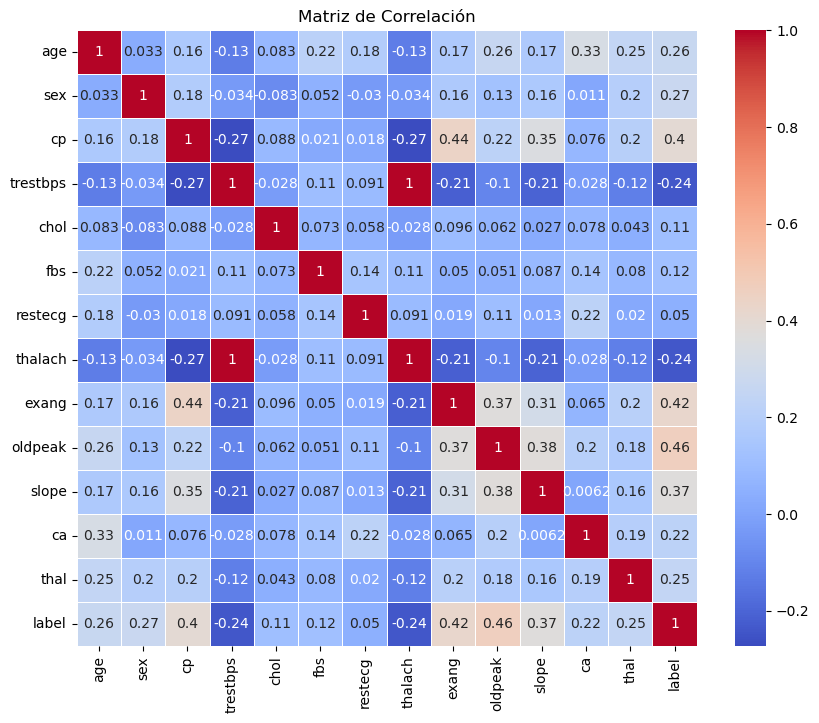

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Calcular la matriz de correlación
correlation_matrix = train_copy_knn.corr()

# Definir el umbral de correlación
threshold = 0

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            mask=np.abs(correlation_matrix) <= threshold)  # Solo muestra las celdas con correlación mayor que el umbral
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

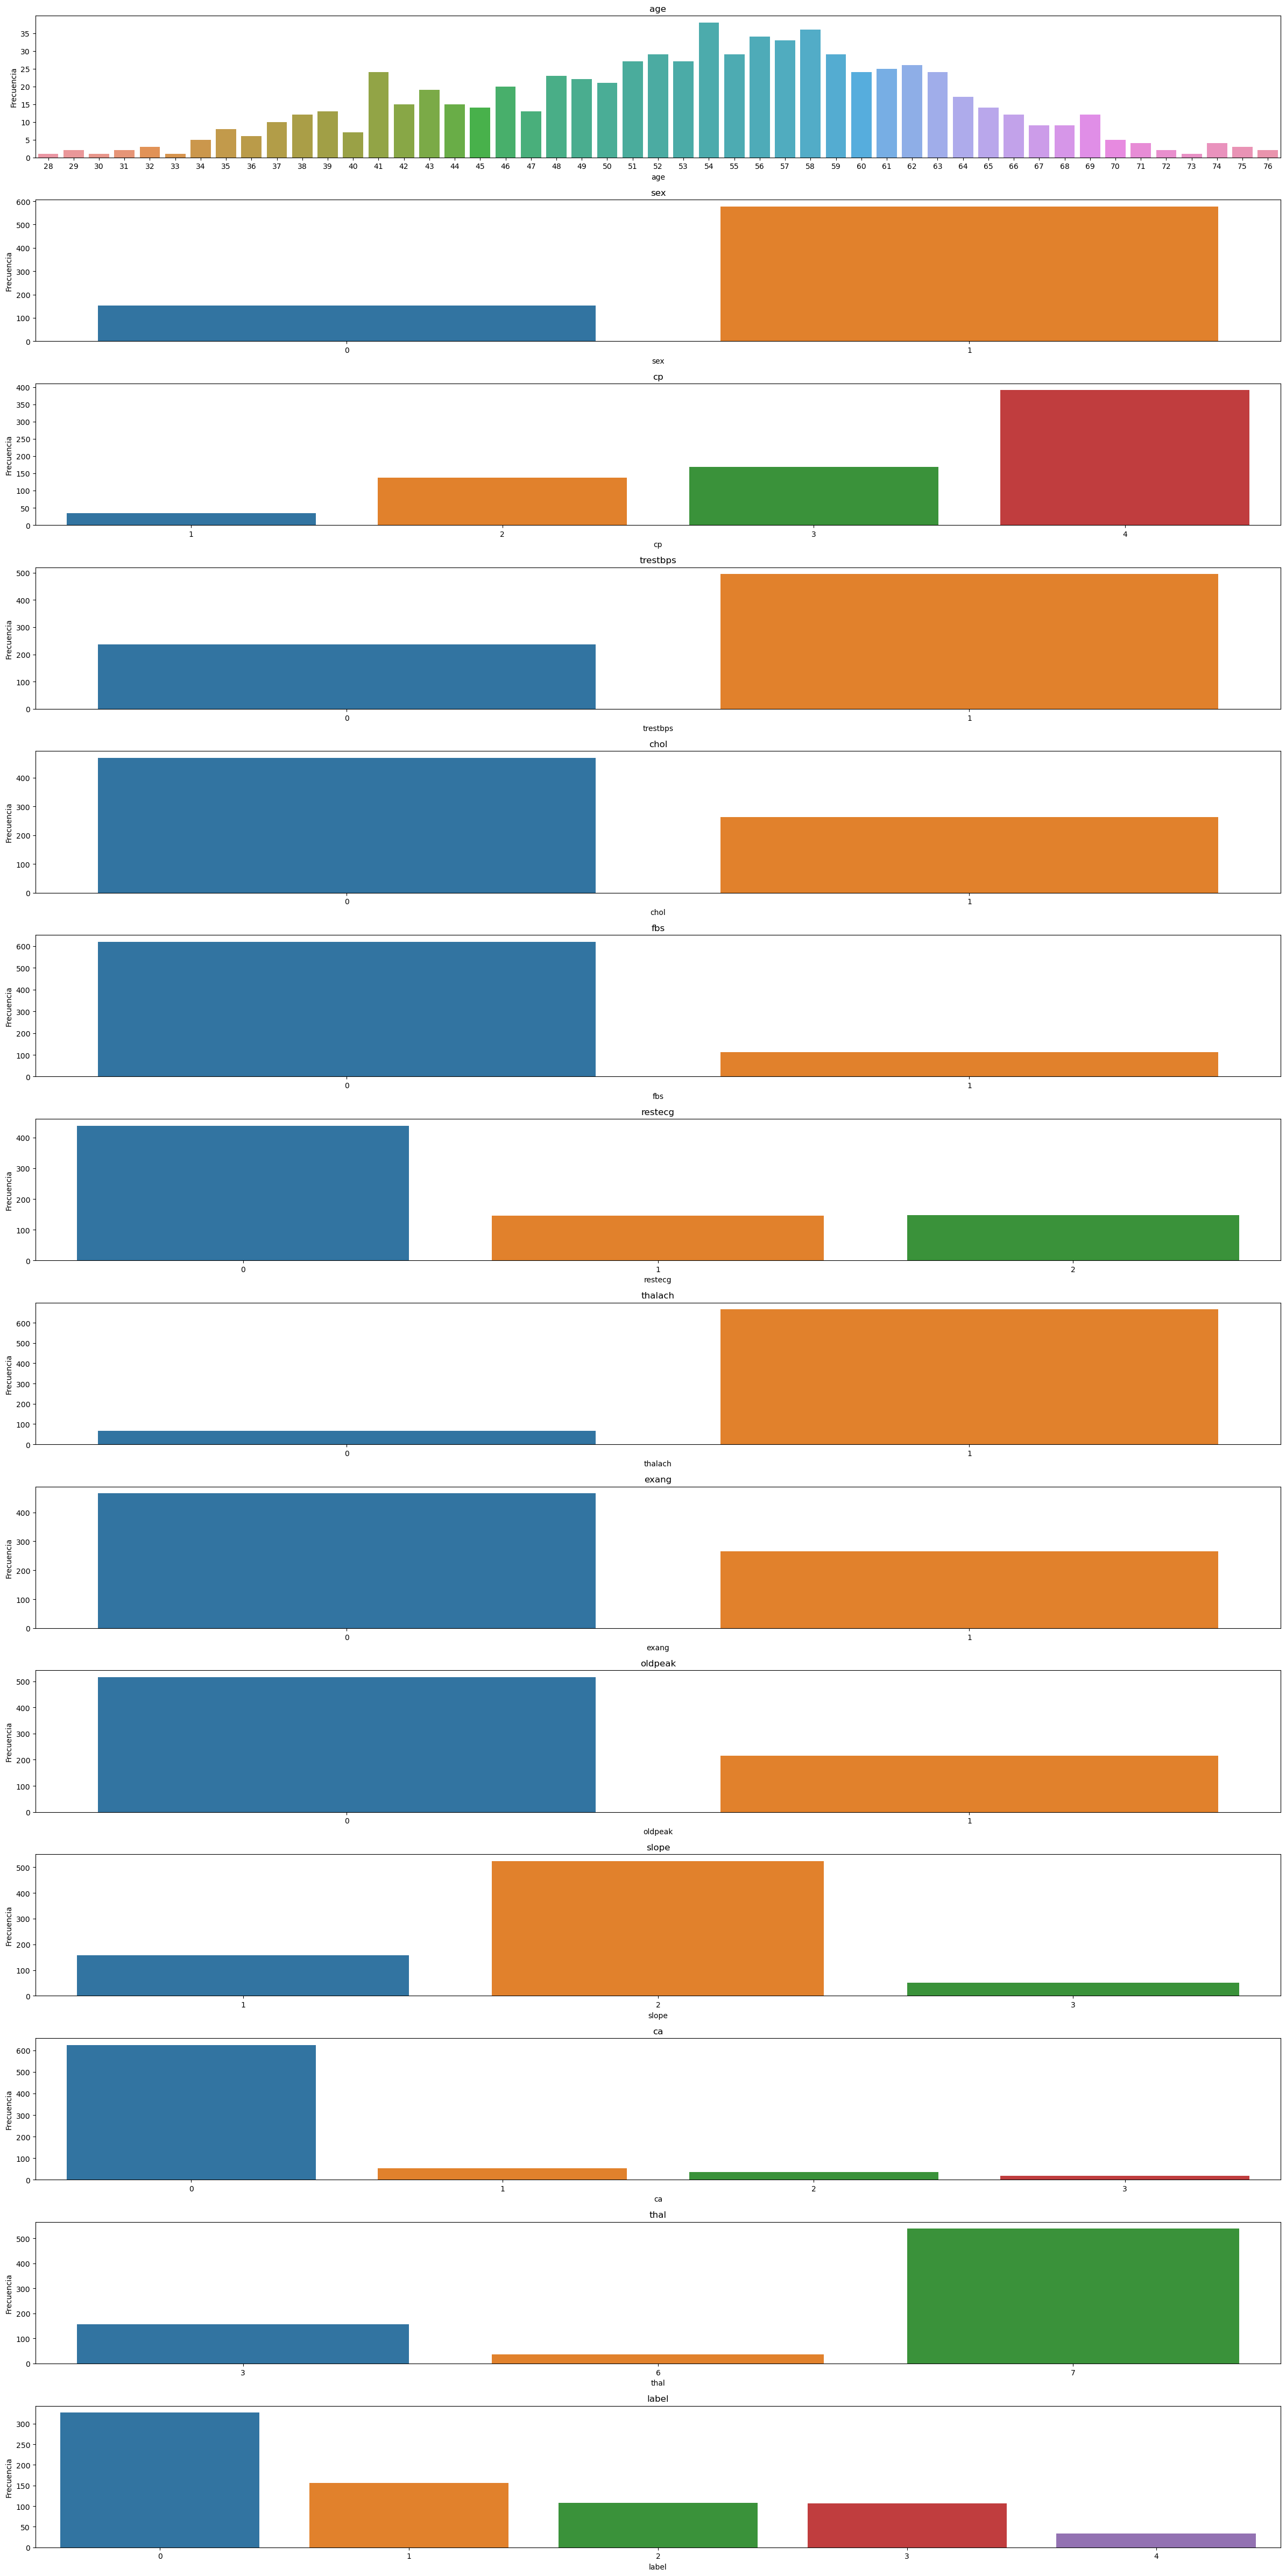

In [441]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 1
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train_copy_e, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B- Transformaciones dataset TEST

#### Definicion de datatypes

In [442]:
test = pd.read_csv("test.csv")

In [443]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [444]:
import numpy as np

# Reemplazar '?' con NaN 
test = test.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
test[int_cols] = test[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
test[float_cols] = test[float_cols].apply(pd.to_numeric, errors='coerce')


# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        test[col] = test[col].replace(-9, np.nan)
    else:
        test[col] = test[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 or x == -9 else x)

# Cambio los 9 en ca por nan
test['ca'] = test['ca'].replace(9, float('nan'))


# Convertir las columnas discretas a tipo entero
test[int_cols] = test[int_cols].astype('Int64')

# Verificar la información del DataFrame
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,<NA>,<NA>
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,<NA>,<NA>,<NA>
2,48,1,2,100.0,NaN,0,0,100.0,0,0.0,<NA>,<NA>,<NA>
3,62,1,4,115.0,0.0,<NA>,0,128.0,1,2.5,3,<NA>,<NA>
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,<NA>,<NA>
180,55,1,2,110.0,214.0,1,1,180.0,0,NaN,<NA>,<NA>,<NA>
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7


#### Reemplazo de valores missing

##### Reemplazo de ***valores faltantes NaN*** por la media en las variables float e int, y por la moda en las variables cat


In [445]:
#Copia del df
test_copy_a =  test.copy()

# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    test_copy_a[col].fillna(test_copy_a[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    test_copy_a[col].fillna(test_copy_a[col].median(), inplace=True)
    
    
test_copy_a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,0,3
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,2,0,3
2,48,1,2,100.0,221.0,0,0,100.0,0,0.0,2,0,3
3,62,1,4,115.0,0.0,0,0,128.0,1,2.5,3,0,3
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,0,3
180,55,1,2,110.0,214.0,1,1,180.0,0,0.6,2,0,3
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7


##### KNN (K-Nearest Neighbors)

In [446]:
from sklearn.impute import KNNImputer

# Copia del dataframe
test_copy_b = test.copy()

# Reemplazar valores cero con NaN
test_copy_b[float_cols] = test_copy_b[float_cols].replace(0, float('nan'))

# Imputar valores faltantes utilizando KNNImputer
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(test_copy_b[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = test_copy_b[int_cols].fillna(test_copy_b.mode().iloc[0])

# Combinar las variables float y int imputadas
test_copy_b = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
test_copy_b = test_copy_b[test.columns]
test_copy_b


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.00,3,0,3
1,52,1,2,160.0,196.0,0,0,165.0,0,1.40,2,0,3
2,48,1,2,100.0,262.2,0,0,100.0,0,1.44,2,0,3
3,62,1,4,115.0,233.2,0,0,128.0,1,2.50,3,0,3
4,51,1,3,110.0,175.0,0,0,123.0,0,0.60,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.00,2,0,3
180,55,1,2,110.0,214.0,1,1,180.0,0,1.06,2,0,3
181,67,1,3,152.0,212.0,0,2,150.0,0,0.80,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.20,2,0,7


##### Normalizacion binaria de continuas a traves de parametros normales

In [447]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
test_copy_c = test.copy()

float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']

train_float = test_copy_c[float_cols]
trainc_categorical = test_copy_c[int_cols].fillna(test_copy_c.mode().iloc[0])

def imputar_valores_anormales(df, rangos_normales):

    # Inicializar un DataFrame para almacenar los valores imputados
    df_imputado = df.copy()
    
    # Iterar sobre cada columna y su rango normal correspondiente
    for col, rango_normal in rangos_normales.items():
        min_val, max_val = rango_normal
        
        # Imputar los valores dentro o fuera del rango normal
        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)
    
    return df_imputado


# Aplicar funcion
train_float_imputado = imputar_valores_anormales(train_float, rangos_normales)



# Combinar las variables float y int imputadas
test_copy_c = pd.concat([trainc_categorical, train_float_imputado], axis=1)

test_copy_c = test_copy_c[test.columns]

test_copy_c

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,1,0,0,2,1,1,1,3,0,3
1,52,1,2,1,0,0,0,1,0,0,2,0,3
2,48,1,2,0,1,0,0,0,0,0,2,0,3
3,62,1,4,0,0,0,0,1,1,1,3,0,3
4,51,1,3,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,1,0,0,0,1,1,1,2,0,3
180,55,1,2,0,0,1,1,1,0,1,2,0,3
181,67,1,3,1,0,0,2,1,0,0,2,0,7
182,59,1,1,1,1,0,2,1,0,0,2,0,7


##### Normalizando valores faltantes con KNN y moda, y convirtiendo catecoricas ordinales a dummy

In [448]:
# Convierto variables seleccionadas a dummy 
test_copy_dummy_d = pd.get_dummies(test_copy_b, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)


# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
test_copy_dummy_d.drop('cp_4', axis=1, inplace=True)
test_copy_dummy_d.drop('restecg_2', axis=1, inplace=True)
test_copy_dummy_d.drop('ca_3', axis=1, inplace=True)
test_copy_dummy_d.drop('slope_3', axis=1, inplace=True)
test_copy_dummy_d.drop('thal_7', axis=1, inplace=True)

test_copy_dummy_d.drop('trestbps', axis=1, inplace=True)
#test_copy_dummy_d.drop('oldpeak', axis=1, inplace=True)

test_copy_dummy_d

,age,sex,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,57,1,173.0,0,119.0,1,3.00,0,0,0,0,0,1,0,0,0,0,1,0
1,52,1,196.0,0,165.0,0,1.40,0,1,0,1,0,1,0,0,0,1,1,0
2,48,1,262.2,0,100.0,0,1.44,0,1,0,1,0,1,0,0,0,1,1,0
3,62,1,233.2,0,128.0,1,2.50,0,0,0,1,0,1,0,0,0,0,1,0
4,51,1,175.0,0,123.0,0,0.60,0,0,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,198.0,0,142.0,1,2.00,0,0,0,1,0,1,0,0,0,1,1,0
180,55,1,214.0,1,180.0,0,1.06,0,1,0,0,1,1,0,0,0,1,1,0
181,67,1,212.0,0,150.0,0,0.80,0,0,1,0,0,1,0,0,0,1,0,0
182,59,1,288.0,0,159.0,0,0.20,1,0,0,0,0,1,0,0,0,1,0,0


## 3 - Entrenamiento del Modelo

### Evaluacion de modelos

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


# Identificar las filas con valores negativos
#valores_negativos = (train < 0).any(axis=1)

#Eliminar las filas con valores negativos
#train = train[~valores_negativos]

#Seleccion del df para entrenar al modelo
df_train = train_copy_d_no_outliers
##########################################################################


# Separacion entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")

Model: LinearRegression, MSE: 1.100239063922602, R2: 0.31612113570360556
Model: Ridge, MSE: 1.100216990103999, R2: 0.3161348561926264
Model: Lasso, MSE: 1.3251160019173671, R2: 0.17634370913776498
Model: DecisionTreeRegressor, MSE: 2.5223880597014925, R2: -0.5678482414843535
Model: RandomForestRegressor, MSE: 1.1225089552238807, R2: 0.3022787731930212


### Entrenamiento de modelo de ***regresion lineal***

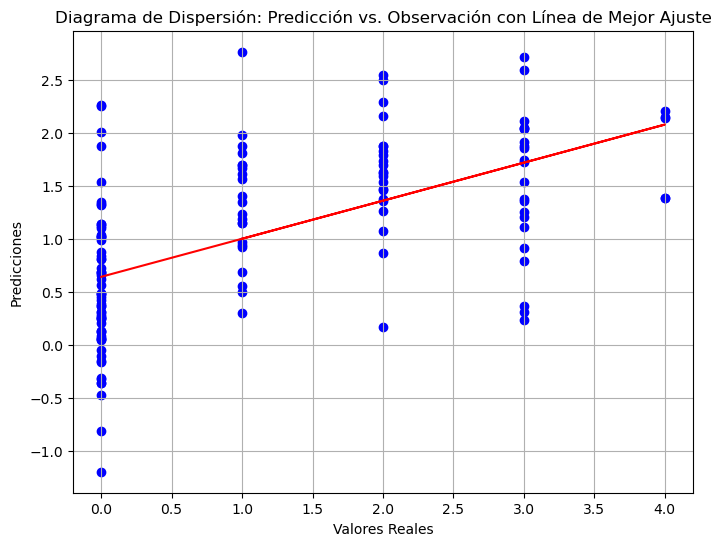

Error cuadrático medio en conjunto de entrenamiento: 0.8983440336518534
Error cuadrático medio en conjunto de prueba: 1.100239063922602
R2 train 0.3974879167466491
R2 test 0.31612113570360556


In [450]:
# Paso 1: Seleccionar y entrenar el modelo de regresión
model = LinearRegression()  
model = model.fit(X_train, y_train)

# Paso 2: Evaluar el rendimiento del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#Metricas de performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

valores_reales = y_test

# Paso 3: Graficar
# Calcular la regresión lineal entre los valores reales y las predicciones
model_chart = model
model_chart.fit(valores_reales.to_numpy().reshape(-1, 1), test_predictions)

# Obtener los coeficientes de la regresión lineal
pendiente = model_chart.coef_[0]
intercepto = model_chart.intercept_

# Crear el diagrama de dispersión con la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(valores_reales, test_predictions, color='blue')
plt.plot(valores_reales, pendiente * valores_reales + intercepto, color='red')  # Línea de mejor ajuste
plt.title('Diagrama de Dispersión: Predicción vs. Observación con Línea de Mejor Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

print("Error cuadrático medio en conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en conjunto de prueba:", test_mse)
print("R2 train", train_r2)
print("R2 test", test_r2)



### Entrenamiento con ***logistic regression***

In [451]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        732 non-null    Int64  
 1   sex        732 non-null    Int64  
 2   chol       732 non-null    float64
 3   fbs        732 non-null    float64
 4   thalach    732 non-null    float64
 5   exang      732 non-null    int64  
 6   oldpeak    732 non-null    float64
 7   label      732 non-null    Int64  
 8   cp_1       732 non-null    int32  
 9   cp_2       732 non-null    int32  
 10  cp_3       732 non-null    int32  
 11  restecg_0  732 non-null    int32  
 12  restecg_1  732 non-null    int32  
 13  ca_0       732 non-null    int32  
 14  ca_1       732 non-null    int32  
 15  ca_2       732 non-null    int32  
 16  slope_1    732 non-null    int32  
 17  slope_2    732 non-null    int32  
 18  thal_3     732 non-null    int32  
 19  thal_6     732 non-null    int32  
dtypes: Int64(3

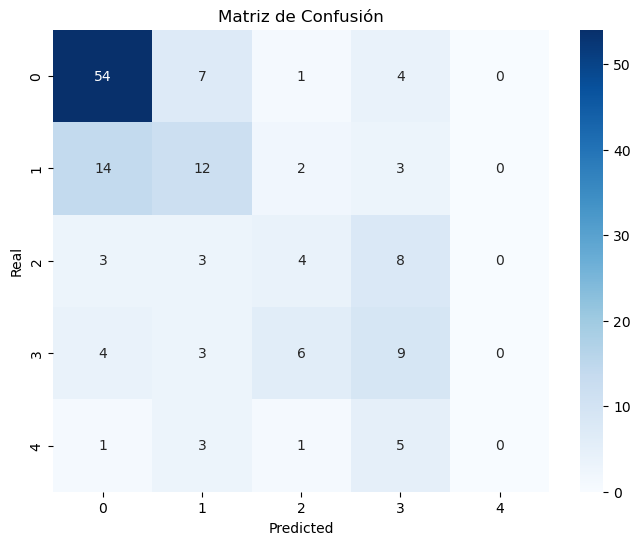

 F1 Score: 0.5106942753229247
Reporte de Clasificación Regresion Logistica TRAIN:
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76        66
         1.0       0.43      0.39      0.41        31
         2.0       0.29      0.22      0.25        18
         3.0       0.31      0.41      0.35        22
         4.0       0.00      0.00      0.00        10

    accuracy                           0.54       147
   macro avg       0.35      0.37      0.35       147
weighted avg       0.49      0.54      0.51       147

Precision TEST Clasificación:
0.5374149659863946


d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [452]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score




#Seleccion del df para entrenar al modelo
df_train = df_dummy
##########################################################################


# Separacion entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística multiclase
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)


# Evaluar el modelo
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)


test_accuracy = accuracy_score(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

# Mostrar el reporte de clasificación

f1_rf = f1_score(y_test, y_pred, average='weighted')
print(" F1 Score:", f1_rf)


print("Reporte de Clasificación Regresion Logistica TRAIN:")
print(classification_report(y_test, y_pred))

print("Precision TEST Clasificación:")
print(test_accuracy)




In [453]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

y_pred_rf = rf_classifier.predict(X_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Classifier F1 Score:", f1_rf)
print("Classification Report (Random Forest Classifier):\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier F1 Score: 0.48207102660884166
Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

         0.0       0.67      0.88      0.76        66
         1.0       0.39      0.29      0.33        31
         2.0       0.21      0.22      0.22        18
         3.0       0.33      0.27      0.30        22
         4.0       0.00      0.00      0.00        10

    accuracy                           0.52       147
   macro avg       0.32      0.33      0.32       147
weighted avg       0.46      0.52      0.48       147



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
from sklearn.model_selection import cross_val_score


# Perform cross-validation on the training data
cv_scores_logreg = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
cv_scores_rf = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='f1_weighted')

# Print cross-validation scores
print("Cross-Validation F1 Scores (Logistic Regression):", cv_scores_logreg)
print("Cross-Validation F1 Scores (Random Forest Classifier):", cv_scores_rf)

# Inspect the distribution of the target variable
print("Training Set Distribution of Target Variable (thal):")
print(y_train.value_counts())
print("Test Set Distribution of Target Variable (thal):")
print(y_test.value_counts())

Cross-Validation F1 Scores (Logistic Regression): [0.49751479 0.46361179 0.45120044 0.42220547 0.46473302]
Cross-Validation F1 Scores (Random Forest Classifier): [0.50636928 0.50783309 0.43156326 0.49046685 0.4275516 ]
Training Set Distribution of Target Variable (thal):
label
0    261
1    125
2     90
3     85
4     24
Name: count, dtype: Int64
Test Set Distribution of Target Variable (thal):
label
0    66
1    31
3    22
2    18
4    10
Name: count, dtype: Int64


## 4 - ***Aplicación del Modelo***


In [455]:
import pandas as pd

# Copia del df TEST
test_model = test_copy_dummy_d.copy()

scaler = StandardScaler()
a = scaler.fit_transform(test_model)


# Agregar columna 'label' con las predicciones
test_model['label'] = model.predict(a)


# Calcular la frecuencia de los valores de la variable 'label' usando groupby
label_freq = test_model.groupby('label').size()

print(label_freq)

# Guardar el DataFrame modificado si es necesario
test_model_csv = test_model

# Mostrar el DataFrame modificado
test_model


label
0.0    97
1.0    37
2.0    20
3.0    29
4.0     1
dtype: int64


,age,sex,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6,label
0,57,1,173.0,0,119.0,1,3.00,0,0,0,0,0,1,0,0,0,0,1,0,3.0
1,52,1,196.0,0,165.0,0,1.40,0,1,0,1,0,1,0,0,0,1,1,0,0.0
2,48,1,262.2,0,100.0,0,1.44,0,1,0,1,0,1,0,0,0,1,1,0,0.0
3,62,1,233.2,0,128.0,1,2.50,0,0,0,1,0,1,0,0,0,0,1,0,2.0
4,51,1,175.0,0,123.0,0,0.60,0,0,1,1,0,1,0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,198.0,0,142.0,1,2.00,0,0,0,1,0,1,0,0,0,1,1,0,1.0
180,55,1,214.0,1,180.0,0,1.06,0,1,0,0,1,1,0,0,0,1,1,0,0.0
181,67,1,212.0,0,150.0,0,0.80,0,0,1,0,0,1,0,0,0,1,0,0,0.0
182,59,1,288.0,0,159.0,0,0.20,1,0,0,0,0,1,0,0,0,1,0,0,0.0


### Aplicación de predicciones y **creacion de archivo *csv***

In [456]:
# Creacion de ID
test_model_csv= test_model_csv['label'].reset_index()


# Renombrar la columna 'index' a 'ID'
test_model_csv['ID'] = test_model_csv.index
test_model_csv = test_model_csv[['ID', 'label']].astype(int)

# Guardar el DataFrame en un archivo CSV
test_model_csv.to_csv('sample_submission.csv', index=False)
test_model_csv

,ID,label
0,0,3
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
179,179,1
180,180,0
181,181,0
182,182,0
